# Model other experiments

In [14]:
import orsa
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

sns.set(style = 'white')
mpl.rc('xtick.minor', visible = True)
mpl.rc('ytick.minor', visible = True)
mpl.rc('xtick', direction='in', top=True, bottom = True)
mpl.rc('ytick', direction='in', right=True, left = True)

print(orsa.__version__)

0.8.5


In [15]:
model = orsa.model.Model(parameters = [], E_eval = np.arange(0.5, 12, 0.01), E_fit_min=0.8, E_fit_max=11, oscillation=orsa.oscillation.load(), detector=orsa.detector.load(which_xs='ibd_heavy', kwargs_xs=dict(Z=28, Q = 0.066977+0.08715, logft=5, r=3.88e-1, J_i=3/2, J_f=2.5, particle='nubar')), use_gpu=False, use_shape_uncertainty=True, rebin = 1, exposure = 1)

# model.detector.target = orsa.detector.Target('63Cu', 'IBD', dict(Z=28, Q = 0.066977+0.08715, logft=5, r=3.88e-1, J_i=3/2, J_f=2.5, particle='nubar'))

model.add_parameter(orsa.model.DetectorParameter(label = 'eff', value = 1,          error = 0.01,   prior = {'positive': None},   formatted_label = r'$\epsilon$'))
model.add_parameter(orsa.model.ResolutionParameter(label = 'a',   value = 0.001,    error = 0.0077, prior = {'positive': None},   formatted_label = r'$a$'))
model.add_parameter(orsa.model.ResolutionParameter(label = 'b',   value = 0.001,   error = 0.,  prior = {'positive': None},   formatted_label = r'$b$'))
model.add_parameter(orsa.model.ResolutionParameter(label = 'c',   value = 0.001,    error = 0.,  prior = {'positive': None},   formatted_label = r'$c$'))
model.add_parameter(orsa.model.NonLinearityParameter(label = 'a0',  value = 0,          error = 1,      is_relative=False,            formatted_label = r'$a^{nl}_0$'))
model.add_parameter(orsa.model.NonLinearityParameter(label = 'a1',  value = 0,          error = 1,      is_relative=False,            formatted_label = r'$a^{nl}_1$'))
model.add_parameter(orsa.model.NonLinearityParameter(label = 'a2',  value = 0,          error = 1,      is_relative=False,            formatted_label = r'$a^{nl}_2$'))
model.add_parameter(orsa.model.NonLinearityParameter(label = 'a3',  value = 0,          error = 1,      is_relative=False,            formatted_label = r'$a^{nl}_3$'))

model.add_parameter(orsa.model.OscillationParameter(label = 'rho',      value = 2.45,       error = 0.06,   prior = {'positive': None}, formatted_label = r'$\rho$'))
model.add_parameter(orsa.model.OscillationParameter(label = 'dm2_21',   value = 7.53e-5,    error = np.inf,                       formatted_label = r'$\Delta m^2_{21}$'))
model.add_parameter(orsa.model.OscillationParameter(label = 'dm2_31',   value = 2.5283e-3,  error = np.inf,                       formatted_label = r'$\Delta m^2_{31}$'))
model.add_parameter(orsa.model.OscillationParameter(label = 's2_12',    value = 0.307,      error = np.inf,                       formatted_label = r'$\sin^2 \theta_{12}$'))
model.add_parameter(orsa.model.OscillationParameter(label = 's2_13',    value = 0.0218,     error = np.inf,                       formatted_label = r'$\sin^2 \theta_{13}$'))

shape_fact = np.sqrt(36e-03/model.bin)
shape_fact_20 = np.sqrt(20e-03/model.bin)

gen_dict = dict()
gen_dict['rea'] = orsa.generator.reactor('HM_bump', True, hasXS=True, shape_uncertainty='tao', xs=model.detector.crosssection)
gen_dict['U'] = orsa.generator.geoneutrinos('238U', True, hasXS=True, shape_uncertainty=0.05, xs=model.detector.crosssection)
gen_dict['Th'] = orsa.generator.geoneutrinos('232Th', True, hasXS=True, shape_uncertainty=0.05, xs=model.detector.crosssection)
gen_dict['K'] = orsa.generator.geoneutrinos('40K', True, hasXS=True, shape_uncertainty=0.05, xs=model.detector.crosssection)

gen_dict['lihe'] =  orsa.generator.sniper('lihe', True, shape_uncertainty=0.1)
gen_dict['acc'] =  orsa.generator.sniper('accidentals', True, shape_uncertainty=0)
gen_dict['fn'] = orsa.generator.common_inputs('FnBkgHistogramAD', orsa.spectrum.ReconstructedSpectrum, True, shape_uncertainty=0.2)
gen_dict['alpha'] = orsa.generator.common_inputs('AlphaNBkgHistogramAD',  orsa.spectrum.ReconstructedSpectrum, True, shape_uncertainty=0.5)
gen_dict['glob'] = orsa.generator.common_inputs('OtherReactorSpectrum_L300km',  orsa.spectrum.ReconstructedSpectrum, True, shape_uncertainty=0.05)
gen_dict['atm'] = orsa.generator.common_inputs('AtmosphericNeutrinoModelGENIE2',  orsa.spectrum.ReconstructedSpectrum, True, shape_uncertainty=0.5) 
gen_dict['snf'] = orsa.generator.common_inputs('SNF_VisibleSpectrum',  orsa.spectrum.UnoscillatedSpectrum, True, shape_uncertainty=0)  
gen_dict['noneq'] = orsa.generator.common_inputs('NonEq_VisibleSpectrum',  orsa.spectrum.UnoscillatedSpectrum, True, shape_uncertainty=0)

model.add_parameter(orsa.model.CoreParameter(label = 'C1', value = 1, error = 0.008, formatted_label = r'$R_\mathrm{YJ-C1}$', baseline = 1452.74, power = 2.9))
model.add_parameter(orsa.model.CoreParameter(label = 'C2', value = 1, error = 0.008, formatted_label = r'$R_\mathrm{YJ-C1}$', baseline = 2000.74, power = 2.9))
model.add_parameter(orsa.model.CoreParameter(label = 'C3', value = 1, error = 0.008, formatted_label = r'$R_\mathrm{YJ-C1}$', baseline = 200.74, power = 2.9))

model.add_parameter(orsa.model.NormalizationParameter(label = 'rea',   value = 61.4,    generator = gen_dict['rea'],     error = 0.01,     is_oscillated=True, has_duty=True,      formatted_label = r'$N_\mathrm{rea}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'U',     value = 94.0,     generator = gen_dict['U'],       error = 0.01,                                           formatted_label = r'$N_\mathrm{U}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'Th',    value = 55.8,     generator = gen_dict['Th'],      error = 0.01,                                           formatted_label = r'$N_\mathrm{Th}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'K',    value = 12,     generator = gen_dict['K'],      error = np.inf,                                           formatted_label = r'$N_\mathrm{K}$'))

model.add_parameter(orsa.model.NormalizationParameter(label = 'acc',   value = 0.8,     generator = gen_dict['acc'],     error = 0.01,                                             formatted_label = r'$N_\mathrm{acc}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'lihe',  value = 0.8,     generator = gen_dict['lihe'],    error = 0.2,                                              formatted_label = r'$N_\mathrm{Li/He}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'fn',    value = 0.1,     generator = gen_dict['fn'],      error = 1.,                                               formatted_label = r'$N_\mathrm{fn}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'alpha', value = 0.05,    generator = gen_dict['alpha'],   error = 0.5,                                              formatted_label = r'$N_\mathrm{\alpha}$'))
# model.add_parameter(orsa.model.NormalizationParameter(label = 'glob',  value = 1.0,     generator = gen_dict['glob'],    error = 0.02,                                             formatted_label = r'$N_\mathrm{glob}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'atm',   value = 0.16,    generator = gen_dict['atm'],     error = 0.5,                                              formatted_label = r'$N_\mathrm{atm}$'))
# model.add_parameter(orsa.model.NormalizationParameter(label = 'snf',   value = 0.14,    generator = gen_dict['snf'],     error = 0.3,      is_oscillated=True, has_duty=False,     formatted_label = r'$N_\mathrm{SNF}$'))
# model.add_parameter(orsa.model.NormalizationParameter(label = 'noneq', value = 0.28,    generator = gen_dict['noneq'],   error = 0.3,      is_oscillated=True, has_duty=True,      formatted_label = r'$N_\mathrm{noneq}$'))

model.exposure = 1

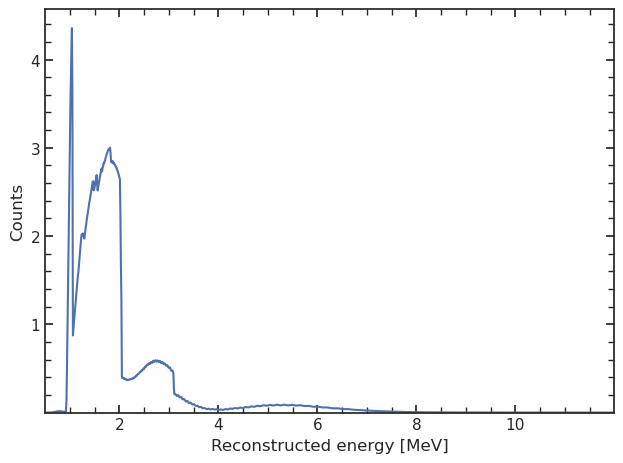

In [16]:
data = model.get_spectrum(True)
data

In [17]:
for param in model.oscillation_parameters:
    model.oscillation_parameters[param].fixed = True

for param in model.detector_parameters:
    model.detector_parameters[param].fixed = True

In [19]:
init_model = model.copy()
model.use_shape_uncertainty = False
cf = orsa.probability.CostFunction(ll=orsa.probability.chi2, model=model, data=data, ll_args = dict(which = 'C'))
true_values = cf.get_params_to_fit()[0]
res = orsa.fit.minuit(cf)
res.true_values = true_values

Cost function parsed as chi2-like


In [20]:
res.obj

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 202.4                      │              Nfcn = 381              │
│ EDM = 4.4e-06 (Goal: 0.0002)     │            time = 3.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a:     │ 1.001e-3  │ 0.008e-3  │            │            │         │         │       │
│ 1 │ a0:    │     0     │     1     │            │            │         │         │       │
│ 2 │ a1:    │   -0.1    │    0.9    │            │            │         │         │       │
│ 3 │ a2:    │    0.0    │    0.9    │            │            │         │         │       │
│ 4 │ a3:    │    0.1    │    0.9    │            │            │         │         │       │
│ 5 │ C1:    │   1.000   │   0.008   │            │            │         │         │       │
│ 6 │ C2:    │   1.000   │   0.008   │            │            │         │         │       │
│ 7 │ C3:    │   0.999   │   0.008   │            │            │         │         │       │
│ 8 │ rea:   │   82.0    │    0.8    │            │            │         │         │       │
│ 9 │ U:     │   93.8    │    0.9    │            │            │         │         │       │
│ 10│ Th:    │   55.7    │    0.6    │            │            │         │         │       │
│ 11│ K:     │   10.3    │    2.8    │            │            │         │         │       │
│ 12│ acc:   │   0.800   │   0.008   │            │            │         │         │       │
│ 13│ lihe:  │   0.79    │   0.16    │            │            │         │         │       │
│ 14│ fn:    │    0.1    │    0.1    │            │            │         │         │       │
│ 15│ alpha: │   0.050   │   0.025   │            │            │         │         │       │
│ 16│ atm:   │   0.16    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│        │        a:       a0:       a1:       a2:       a3:       C1:       C2:       C3:      rea:        U:       Th:        K:      acc:     lihe:       fn:    alpha:      atm: │
├────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│     a: │  5.92e-11   0.18e-9   3.31e-9  -3.54e-9  -1.56e-9         0         0   0.02e-9   2.26e-9  16.64e-9   7.27e-9 250.42e-9         0   0.03e-9   0.01e-9         0   0.01e-9 │
│    a0: │   0.18e-9     0.961      -0.1       0.1       0.1        -0        -0        -0      -0.0       0.0     -0.00         0        -0    -0.000    -0.000        -0    -0.000 │
│    a1: │   3.31e-9      -0.1     0.783       0.2       0.2        -0        -0        -0      -0.0      -0.0     -0.00      -0.0        -0    -0.000    -0.000        -0    -0.000 │
│    a2: │  -3.54e-9       0.1       

In [21]:
import scipy
def evt2sigma(e, bkg):
    cum_poiss = scipy.stats.poisson.cdf(e-1., mu = bkg)
    sigmas = scipy.stats.norm.ppf(cum_poiss)
    return sigmas

In [23]:
events = np.arange(1e-9, 16, .1)

x_nores, y_nores = res.obj.profile('K:', grid = events) # no res, bkg finer_binning

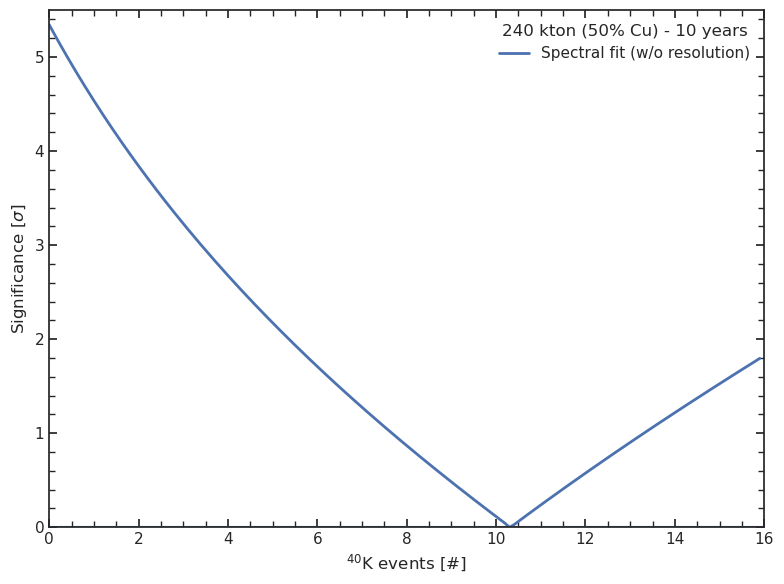

In [24]:
fig, ax = plt.subplots(figsize = (8, 6))

ax.axhline()
ax.plot(x_nores, np.sqrt(y_nores-min(y_nores)), 'b-', lw = 2, label = 'Spectral fit (w/o resolution)')

ax.set_xlim(left = 0, right = 16)
ax.set_ylim(0, 5.5)
ax.legend(title = '240 kton (50% Cu) - 10 years', frameon = False)

ax.set_xlabel(r'$^{40}$K events [#]')
ax.set_ylabel(r'Significance [$\sigma$]')
fig.tight_layout()